# AERONET AOD 550 INTERPOLATED TIME SERIES
The aim of this code is to show the interpolated AOD550 time series of each AERONET station

In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
#from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
print("librerias ok")
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


librerias ok


In [2]:
# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,colors,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
#     fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        #data_mean  = data.resample('1D').mean()
        data_mean  = data['aod_550'].resample('1D').mean()
        #data_mean  = data['aod_550'].resample('1M').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        #mean = data_mean_period['aod_550'].mean()    
        mean = data_mean_period.mean()

       
        ########################                PLOT                ########################
        # Figure
        #ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
        ax[i][j].plot(data_mean_period.index, data_mean_period,c=colors[p])
              
        # Daily average text
#         ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['aod_550'].mean(),2)),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'size': 9})
        ax[i][j].text(data_mean_period.index[1],1.6, "Average =" +" "+ str(round(data_mean_period.mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 13})
        
        # Daily average line
        ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],1.45, "sd =" +" "+ str(round(data_mean_period.std(),2)), 
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 13})
        ax[i][j].text(data_mean_period.index[1],1.30, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 13})
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
        ax[i][j].set_xlabel(r'Date',size=13)
        ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=13)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 20})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.8)
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        #ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-01-01'))
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

1_SP_2015-2022_interp-s_V02_L2.csv
SP
2_ST_2015-2022_interp-s_V02_L2.csv
ST
3_BA_2015-2022_interp-s_V02_L2.csv
BA
4_MD_2015-2022_interp-s_V02_L2.csv
MD
5_LP_2015-2022_interp-s_V02_L2.csv
LP
6_MX_2015-2022_interp-s_V02_L2.csv
MX


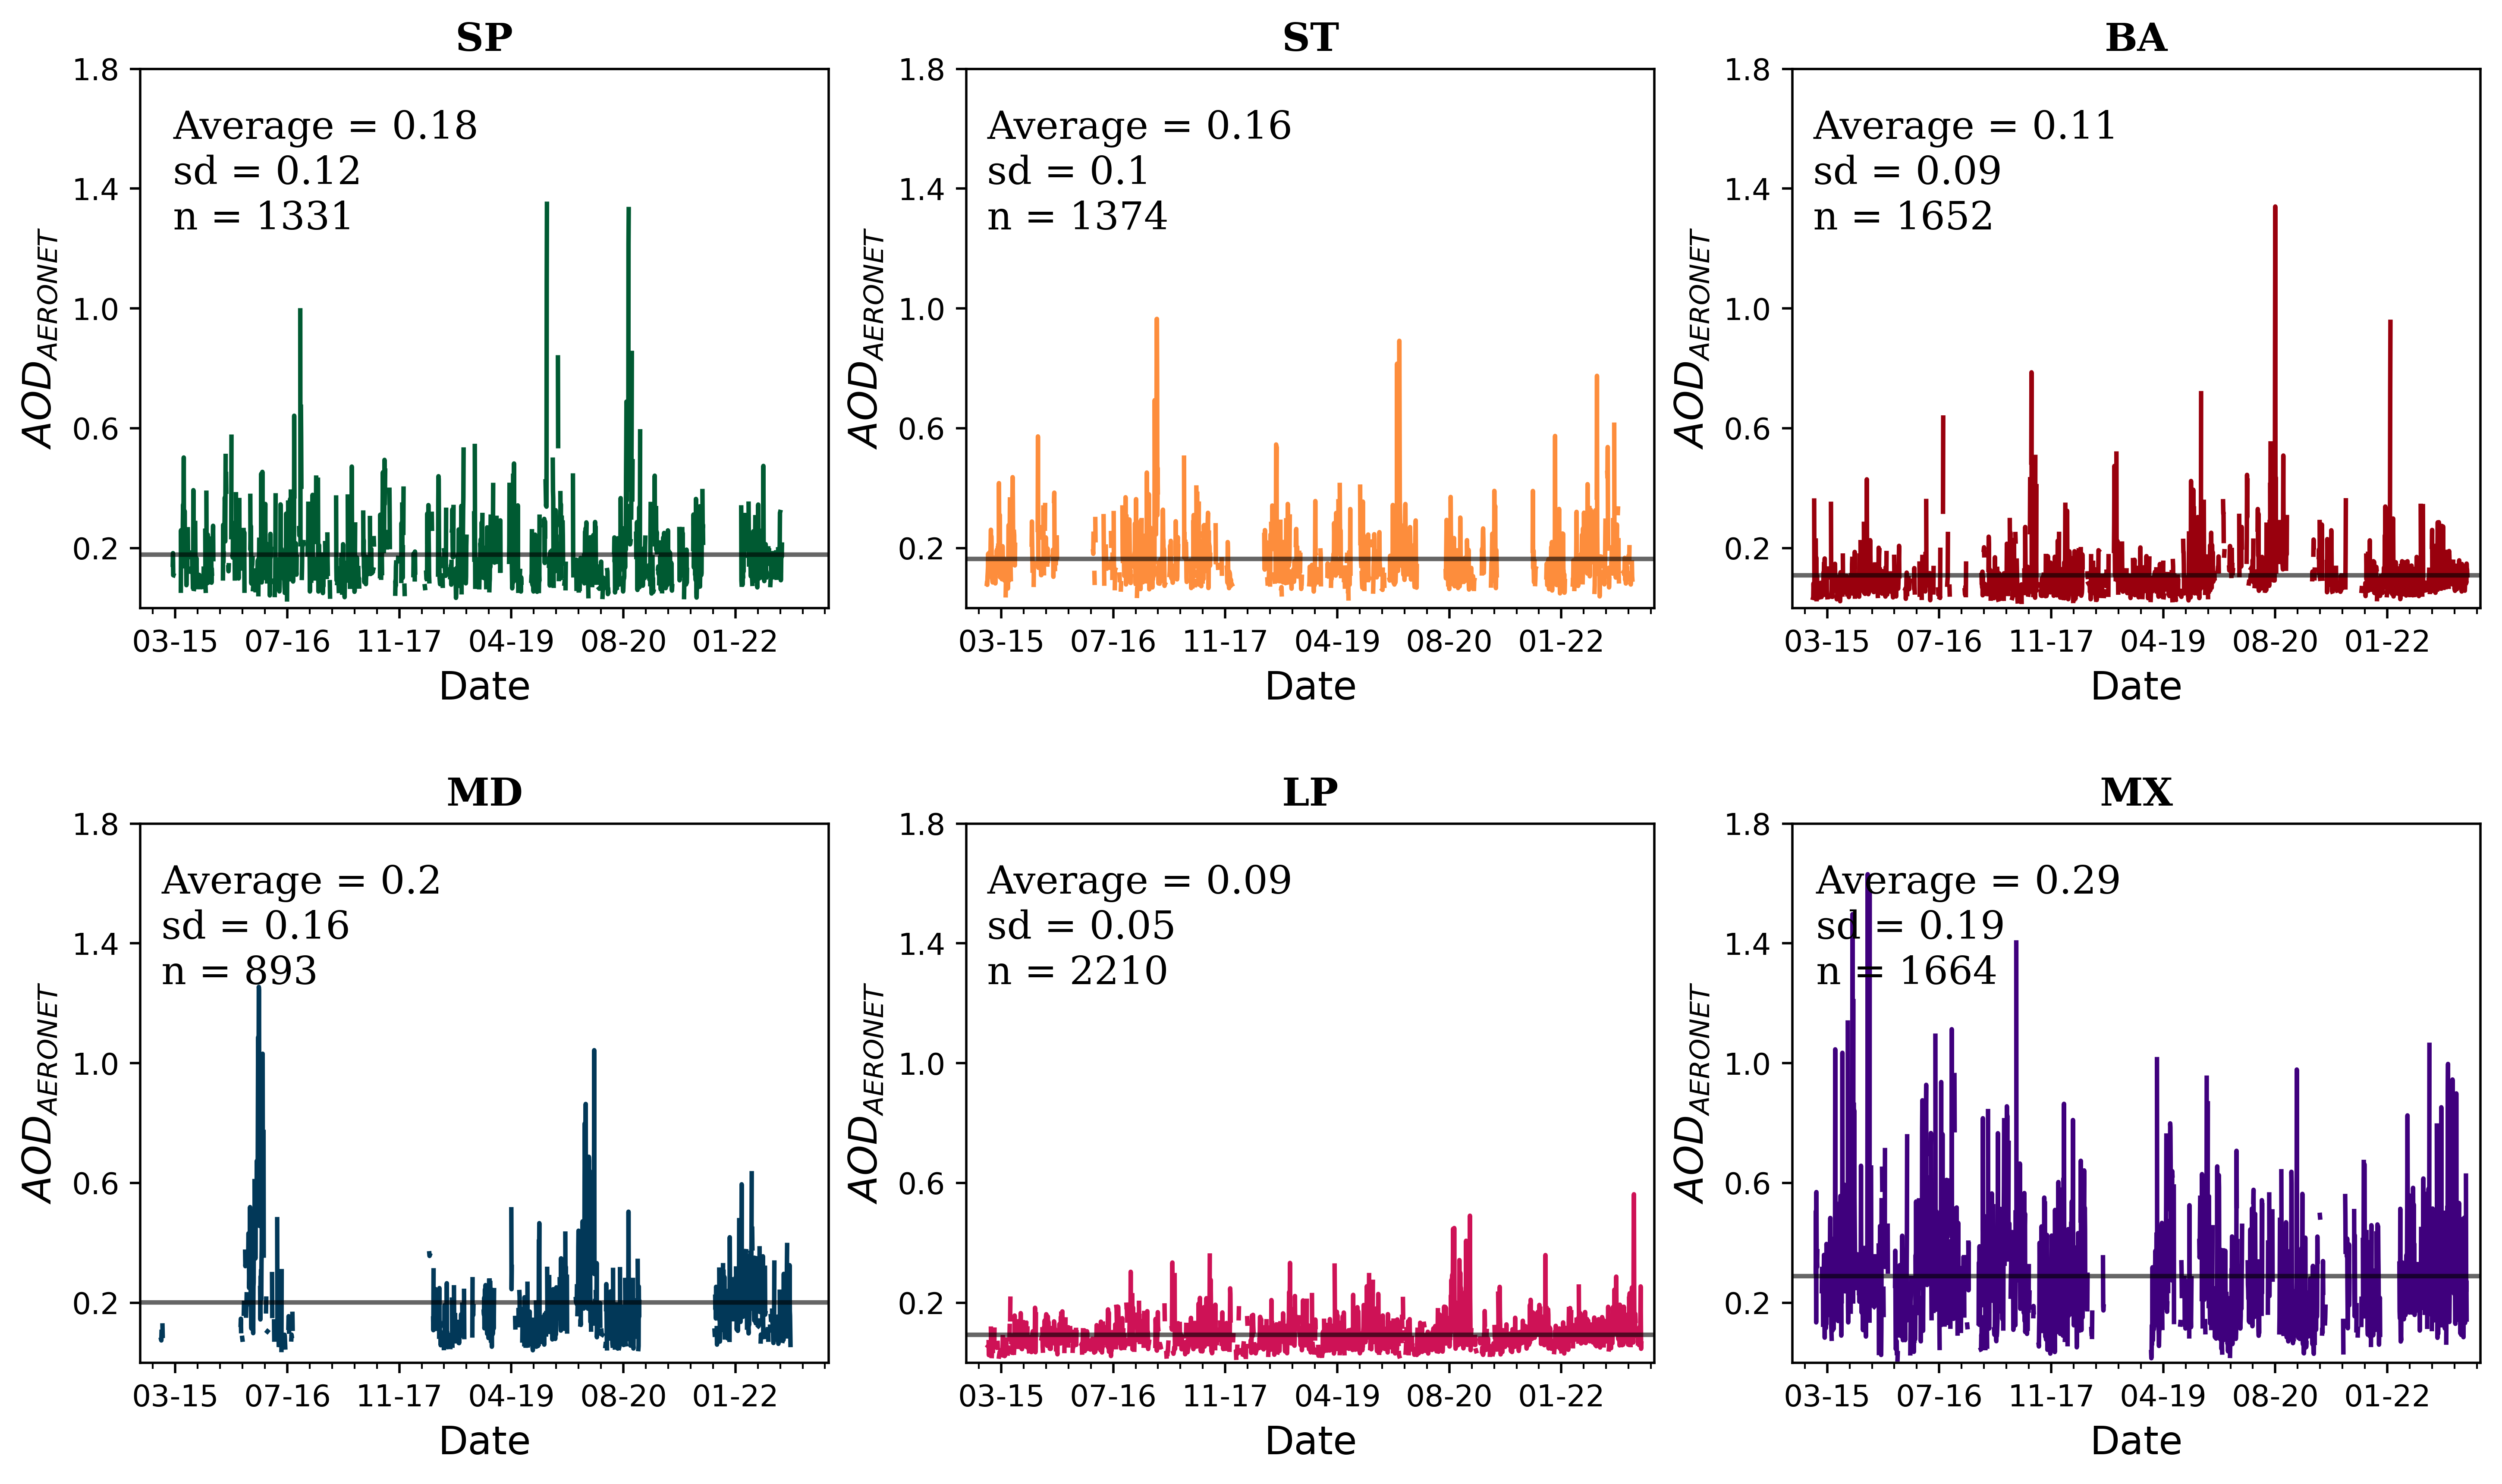

In [3]:
# Function for estimating AOD550 - QUADRATIC INTERPOLATION FUNCTION
#aeronet_plot (path="D:/Josefina/Proyectos/PAPER/aeronet/datasets_interp_s",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
#VERSION 01 MAIAC - AERONET
#aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/aeronet/datasets_interp_s_v2",date_format='%d/%m/%Y %H:%M',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')
#VERSION 02 MAIAC - AERONET
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/Latam",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


1_GS_2015-2022_interp-s_V02_L2.csv
GS
2_GT_2015-2022_interp-s_V02_L2.csv
GT
3_MS_2015-2022_interp-s_V02_L2.csv
MS
4_CT_2015-2022_interp-s_V02_L2.csv
CT
5_SL_2015-2022_interp-s_V02_L2.csv
SL
6_UH_2015-2022_interp-s_V02_L2.csv
UH


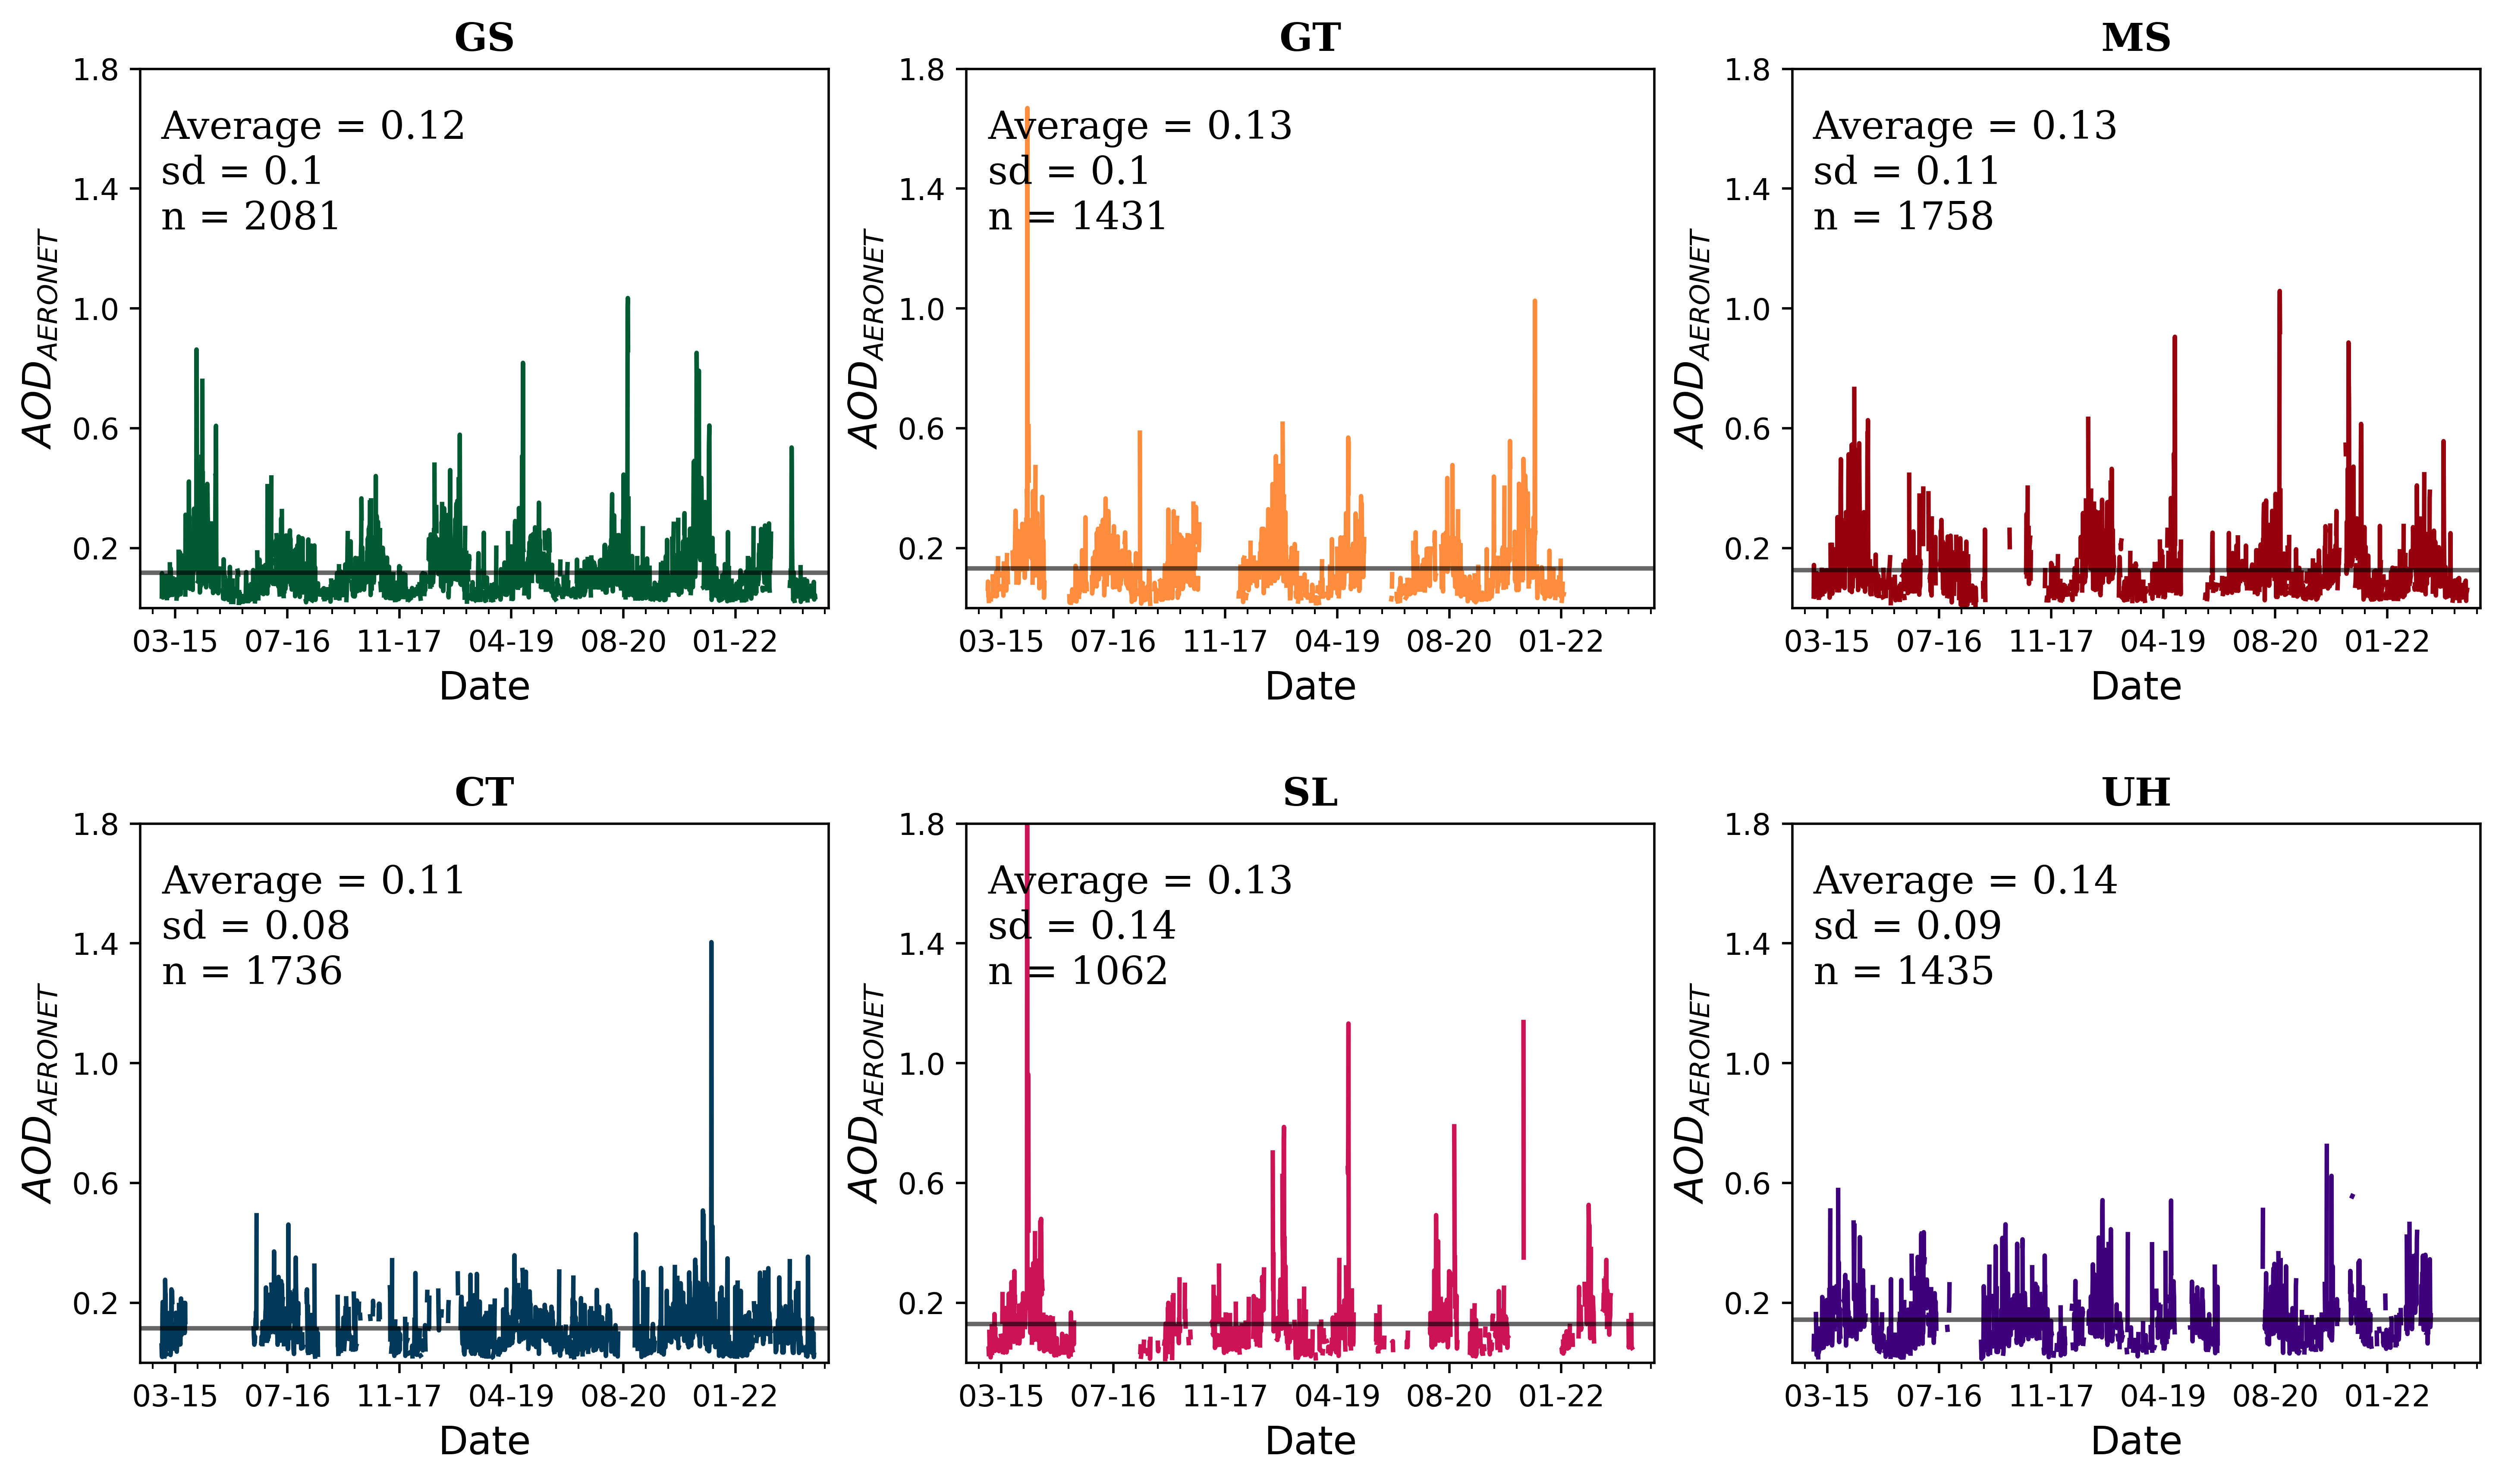

In [13]:
# V02 USA
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/V02/aeronet/datasets_interp_s_L02/USA",date_format='%d/%m/%Y %H:%M',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d","#c994c7"], plot='lala')


In [7]:
# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,colors,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,8),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        #data_mean  = data.resample('1D').mean()
        #data_mean  = data['aod_550'].resample('1D').mean()
        data_mean  = data.resample('1M').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        #mean = data_mean_period['aod_550'].mean()    
        mean = data_mean_period.mean()

       
        ########################                PLOT                ########################
        # Figure
        #ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
        ax[i][j].plot(data_mean_period.index, data_mean_period,c=colors[p])
              
        # Daily average text
#         ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['aod_550'].mean(),2)),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'size': 9})
        ax[i][j].text(data_mean_period.index[1],1.6, "Average =" +" "+ str(round(data_mean_period.mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 10})
        
        # Daily average line
        ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],1.45, "sd =" +" "+ str(round(data_mean_period.std(),2)), 
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 10})
        ax[i][j].text(data_mean_period.index[1],1.30, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 10})
        # Axes names
        #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
        ax[i][j].set_xlabel(r'Date',size=10)
        ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=10)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.85, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.8)
        #ax[i][j].set_xlim('01-2015','12-2022')

        ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        #ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-01-01'))
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

In [19]:
p =  pd.read_csv("D:/Josefina/paper_git/paper_maiac/datasets/aeronet/datasets_interp_s_v2/1_SP_2015-2022_interp-s.csv") 
date_format='%Y-%m-%d %H:%M:%S'
p["Timestamp"] = p["date"].apply(lambda x: datetime.strptime(x,date_format))
# #Becomes the index column
p.set_index('Timestamp', inplace = True)
# # Media diaria
# 
df = p.sort_index()
data_mean_period = df['2015-01-23 00:00:00':'2022-12-31 00:00:00']
data_mean_period.tail()
data_mean_period= data_mean_period.dropna()
data_mean_period
data_mean  = data_mean_period['aod_550'].resample('1D').mean()

TypeError: Could not convert 2015-01-01 13:23:002015-01-01 13:27:002015-01-01 13:32:002015-01-01 13:38:002015-01-01 13:46:002015-01-01 13:55:002015-01-01 14:07:002015-01-01 14:16:002015-01-01 14:24:002015-01-01 14:30:002015-01-01 14:41:002015-01-01 14:56:002015-01-01 15:19:002015-01-01 15:26:002015-01-01 15:41:002015-01-01 15:56:002015-01-01 16:11:002015-01-01 16:19:002015-01-01 16:26:002015-01-01 16:41:002015-01-01 17:56:002015-01-01 18:19:002015-01-01 18:26:00 to numeric

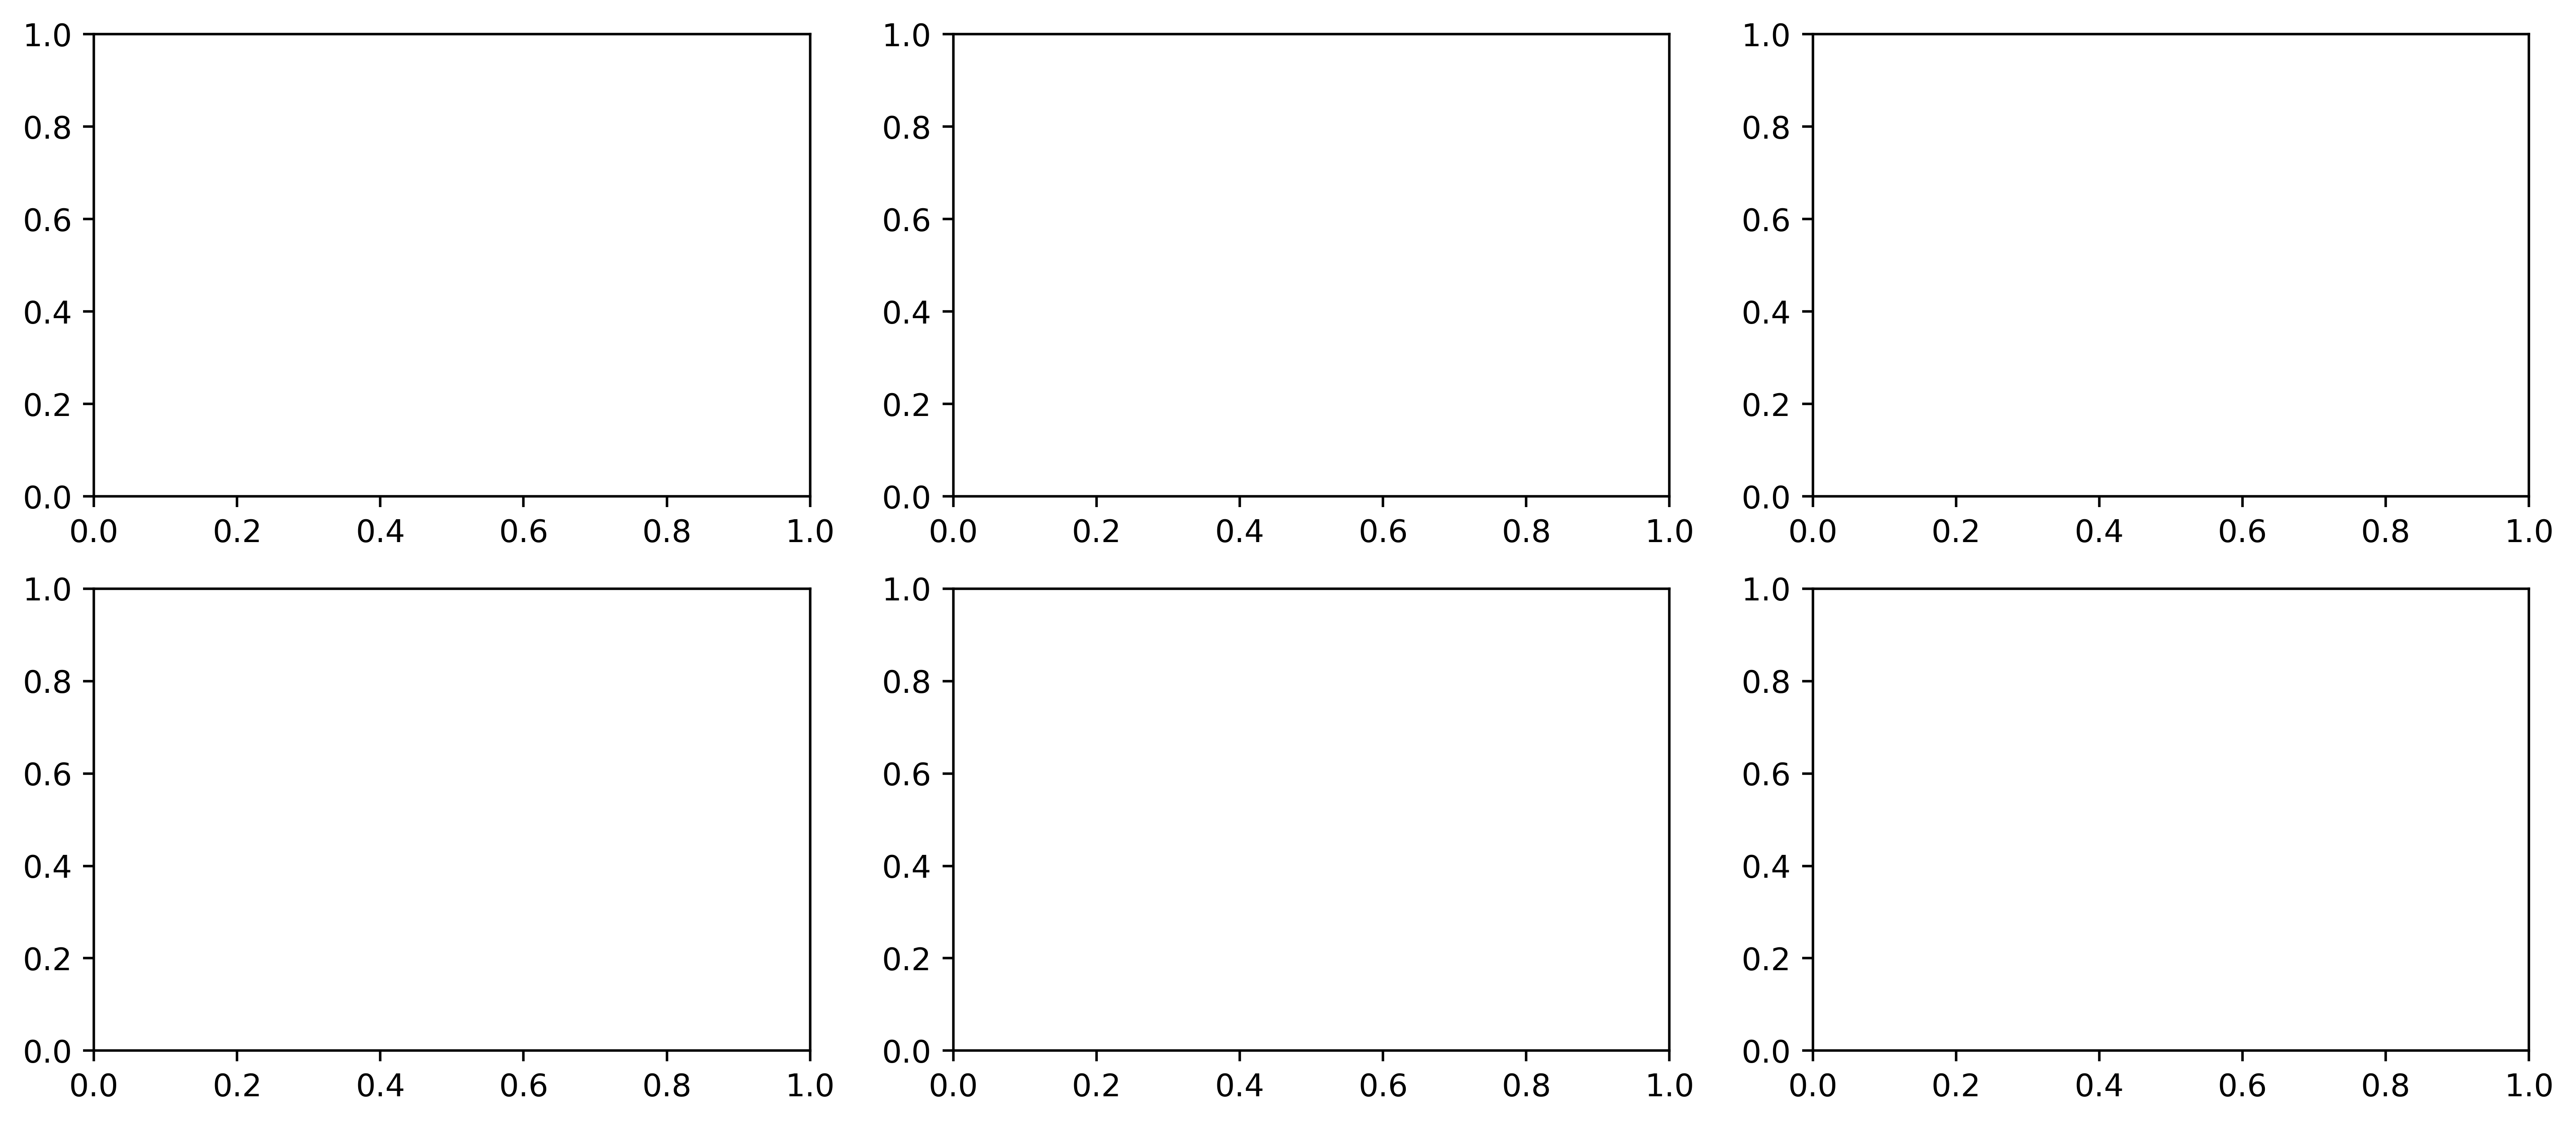

In [9]:
# Estaciones de EE.UU
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"], plot='LALAL')


In [15]:


# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,colors,plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)#figsize=(14,6)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        data_mean  = data.resample('1D').mean()
#         data_mean  = data.resample('1M').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [2:4]
        print(files)
        mean = data_mean_period['aod_550'].mean()    
        ########################                PLOT                ########################
        
        # Figure
        ax[i][j].hist(data_mean_period.aod_550,bins=6,color=colors[p])
              
#         # Daily average text
#         ax[i][j].text(data_mean_period.index[1],1.3, "Average =" +" "+ str(round(data_mean_period['aod_550'].mean(),2)),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'size': 9})
        
#         # Daily average line
#         ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
#         # Daily lenth text
#         ax[i][j].text(data_mean_period.index[1],1.2, "n =" +" "+ str(data_mean_period_len),  
#             ha="left", va="center",fontdict={'family': 'serif', 
#             'color' : 'Black',
#             #'weight': 'bold',
#             'size': 9})
#         # Axes names
#         #ax[i][j].set_xlabel(r'$AOD_{Date}$',size=10)
#         ax[i][j].set_xlabel(r'Date',size=10)
#         ax[i][j].set_ylabel(r'$AOD_{AERONET}$',size=10)
        
#         #Ticks
# #         ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.6, 0.4))
        
#         # Title of each subplot corresponds to the name of the AERONET station.
#         ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
#             'color' : 'Black',
#             'weight': 'bold',
#             'size': 16})
#         # Day fotmat
# #         Format = mdates.DateFormatter('%m-%y')
# #         ax[i][j].xaxis.set_major_formatter(Format)
# #         ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
# #         ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
# #         ax[i][j].set_ylim(0,1.4)
#         #ax[i][j].set_xlim('01-2015','12-2022')

# #         ax[i][j].set_xlim(pd.Timestamp('2014-10-01'), pd.Timestamp('2023-02-28'))
        ax[i][j].set_xlim(0, 2.5)
#         # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                   bottom=0.15, 
                   right=0.9, 
                   top=0.9, 
                   wspace=0.2, 
                   hspace=0.4)
        
#         plt.subplots_adjust(left=0.15,
#                     bottom=0.17, 
#                     right=1.1, 
#                     top=1.1, 
#                     wspace=0.4, 
#                     hspace=0.6)
        
        # Location of data in each subplot
        print(station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
   # Save the plot to the current path
    if plot == 'save':
        return(plt.savefig("aeronet_plot2.jpg", dpi=500))
    else:
        return(plt.show())

1_GSFC-2015-2022_interp-s.csv
GS
2_GTech-2015-2022_interp-s.csv
GT
3_MDScience_C_interp-s.csv
MD
4_CalTech-2015-2022_interp-s.csv
Ca
5_STL-2015-2022_interp-s.csv
ST
6_UH-2015-2022_interp-s.csv
UH


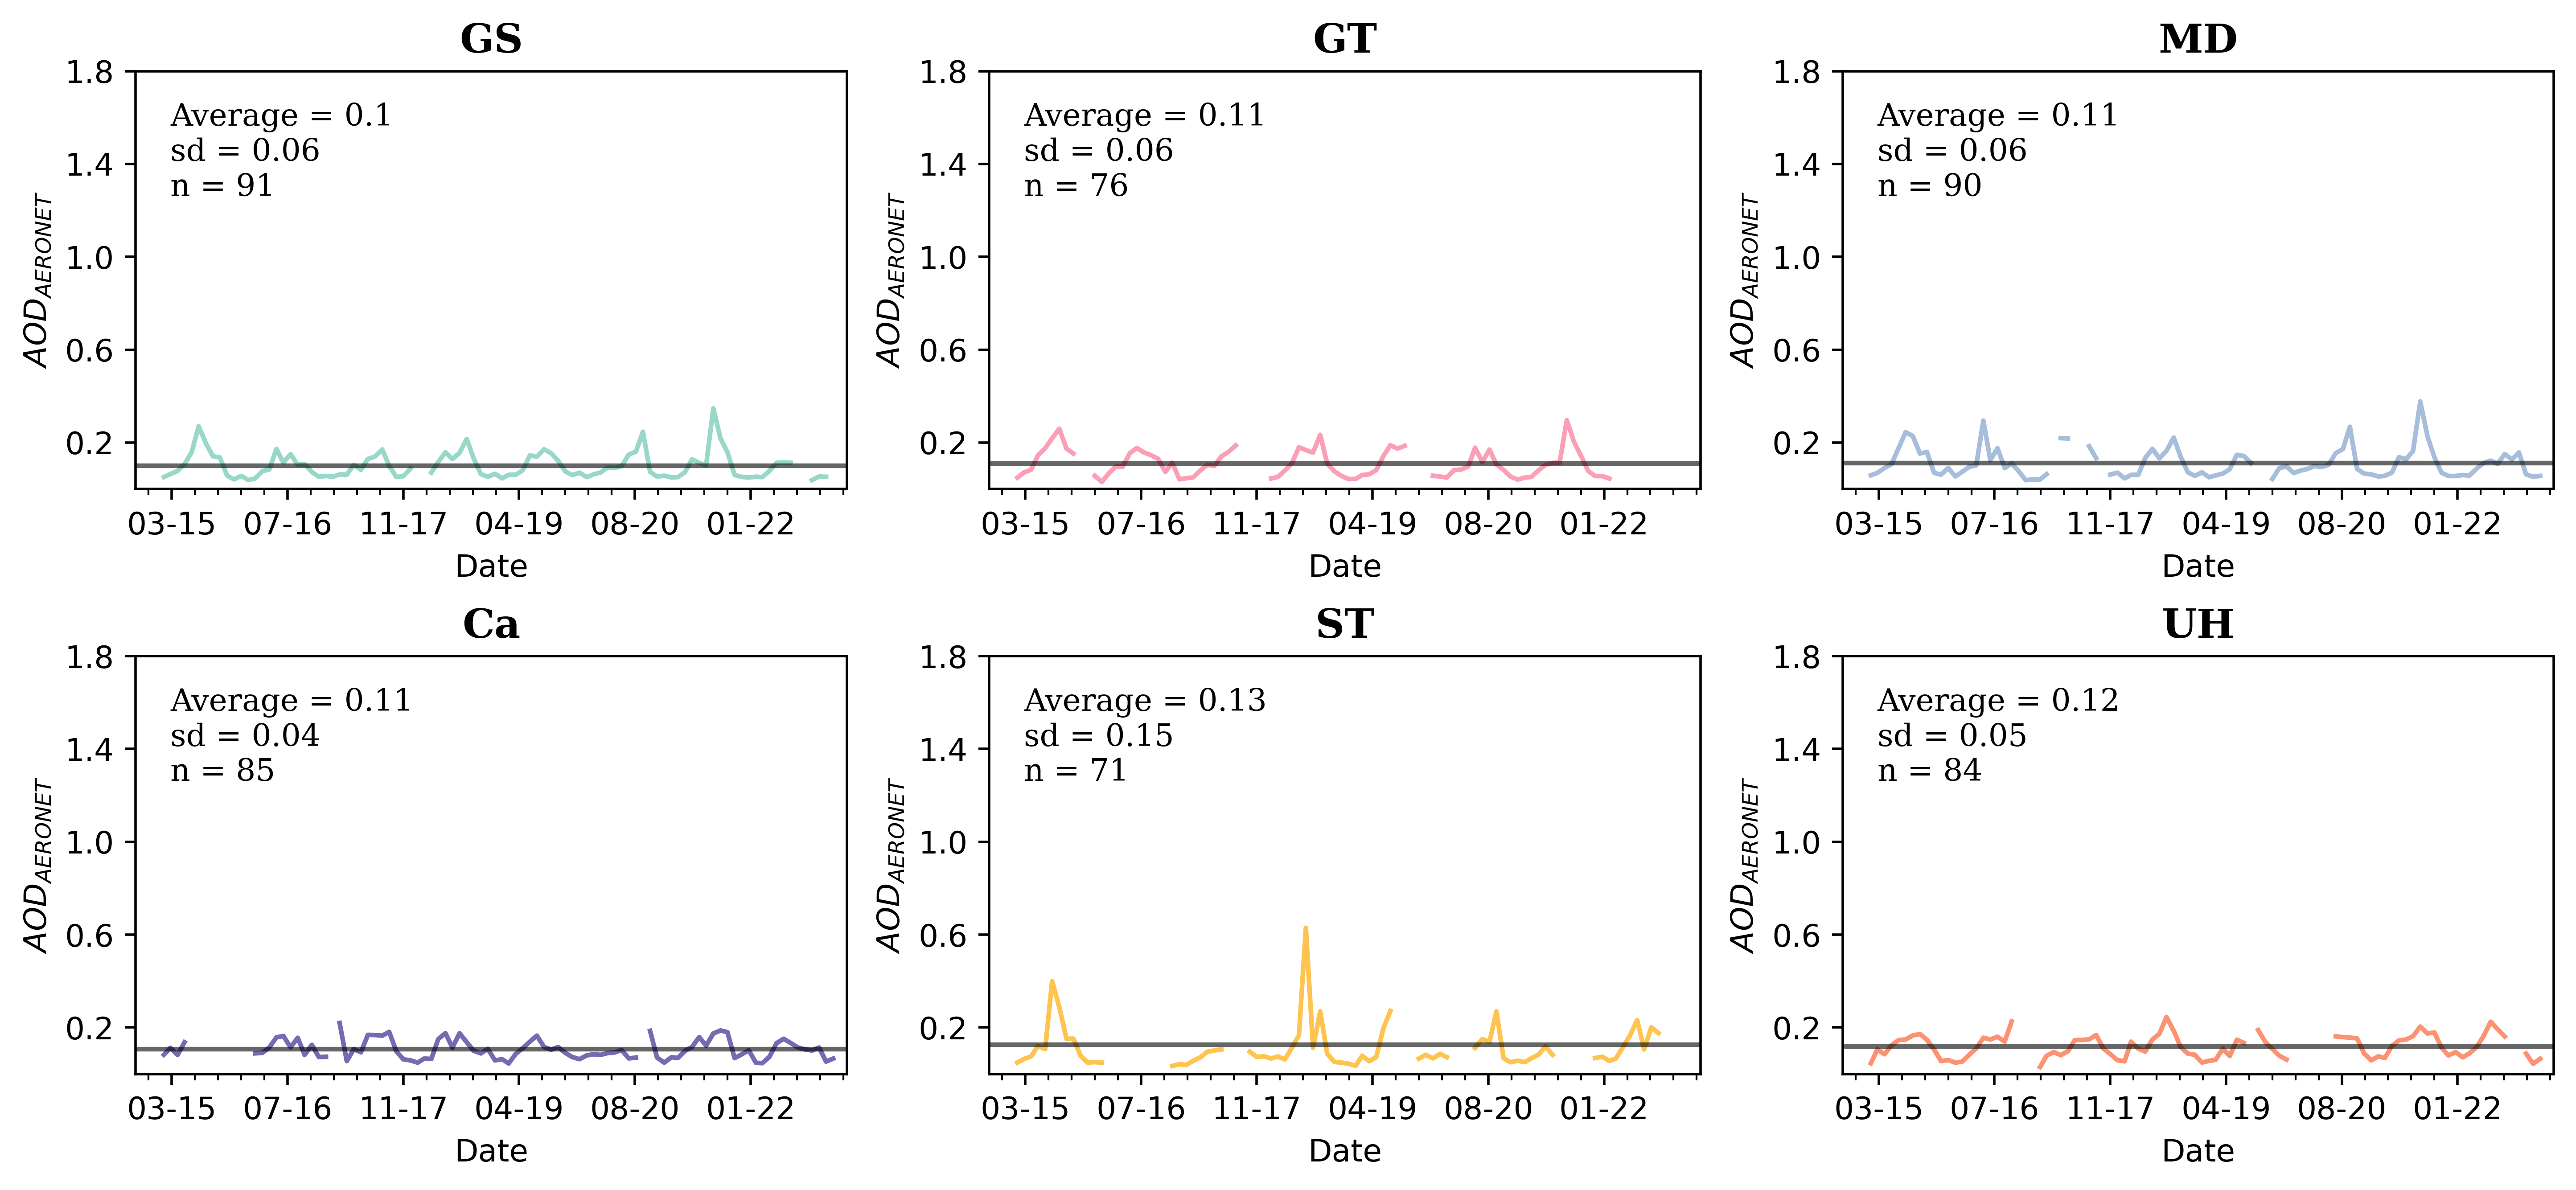

In [18]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"], plot='LALAL')


In [5]:
# AERONET station time series
def aeronet_plot (path, date_format, nrows, ncols, colors, plot):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columns the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    '''
    i = 0 
    j = 0 
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14,8), dpi=500)
    colors = ["#00441b","#ec7014","#ef6548","#045a8d","#dd3497","#807dba"]
    colores = ["#99d8c9","#fec44f","#fc8d59", "#a6bddb","#f768a1","#bcbddc"]
    
    # The folder where the files of each station are located is browsed.
    for p, files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path, files))
        # A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x, date_format))
        # Becomes the index column
        data.set_index('Timestamp', inplace=True)
        # Media diaria
        data_mean_maiac = data['AOD_550_maiac_mean'].resample('1D').mean()
        data_mean_aer = data['AOD_550_AER_mean'].resample('1D').mean()
        
        # The days of the study period are completed
        data_mean_period_maiac = data_mean_maiac['2015-01-01':'2022-12-31']
        data_mean_period_aer = data_mean_aer['2015-01-01':'2022-12-31']
        data_mean_period_len = len(data_mean_maiac.dropna(how='all'))
        # Station Name
        station_name = files[2:4]
        print(files)
        
        ########################                PLOT                ########################
        # Figure
        ax[i][j].boxplot([data_mean_period_maiac.dropna(), data_mean_period_aer.dropna()],
                         labels=["MAIAC", "AERONET"], patch_artist=True,
                         boxprops=dict(facecolor=colors[p], color=colors[p]),
                         medianprops=dict(color="black"))
        
        # Daily average text
        ax[i][j].text(1.5, 1.6, "Average = " + str(round(data_mean_period_maiac.mean(), 2)),  
                      ha="left", va="center", fontdict={'family': 'serif', 
                                                        'color': 'Black', 
                                                        'size': 13})
        
        # Daily average line
        ax[i][j].axhline(y=data_mean_period_maiac.mean(), color="black", linewidth=1.5, alpha=0.6, linestyle='-')
        
        # Daily length text
        ax[i][j].text(1.5, 1.45, "sd = " + str(round(data_mean_period_maiac.std(), 2)), 
                      ha="left", va="center", fontdict={'family': 'serif', 
                                                        'color': 'Black', 
                                                        'size': 13})
        ax[i][j].text(1.5, 1.30, "n = " + str(data_mean_period_len),  
                      ha="left", va="center", fontdict={'family': 'serif', 
                                                        'color': 'Black', 
                                                        'size': 13})
        
        # Axes names
        ax[i][j].set_xlabel('Date', size=13)
        ax[i][j].set_ylabel('$AOD_{AERONET}$', size=13)
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name, fontsize=13, fontdict={'family': 'serif', 
                                                                'color': 'Black', 
                                                                'weight': 'bold', 
                                                                'size': 20})
        
        # Configuration of subplots
        plt.subplots_adjust(left=0.125, bottom=0.15, right=0.9, top=0.9, wspace=0.2, hspace=0.4)
        
        if j == ncols-1:
            i = i + 1
            j = 0
        else:
            j = j + 1

    # Save the plot to the current path
    if plot == 'save':
        plt.savefig("aeronet_boxplot.jpg", dpi=500)
    else:
        plt.show()

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA'

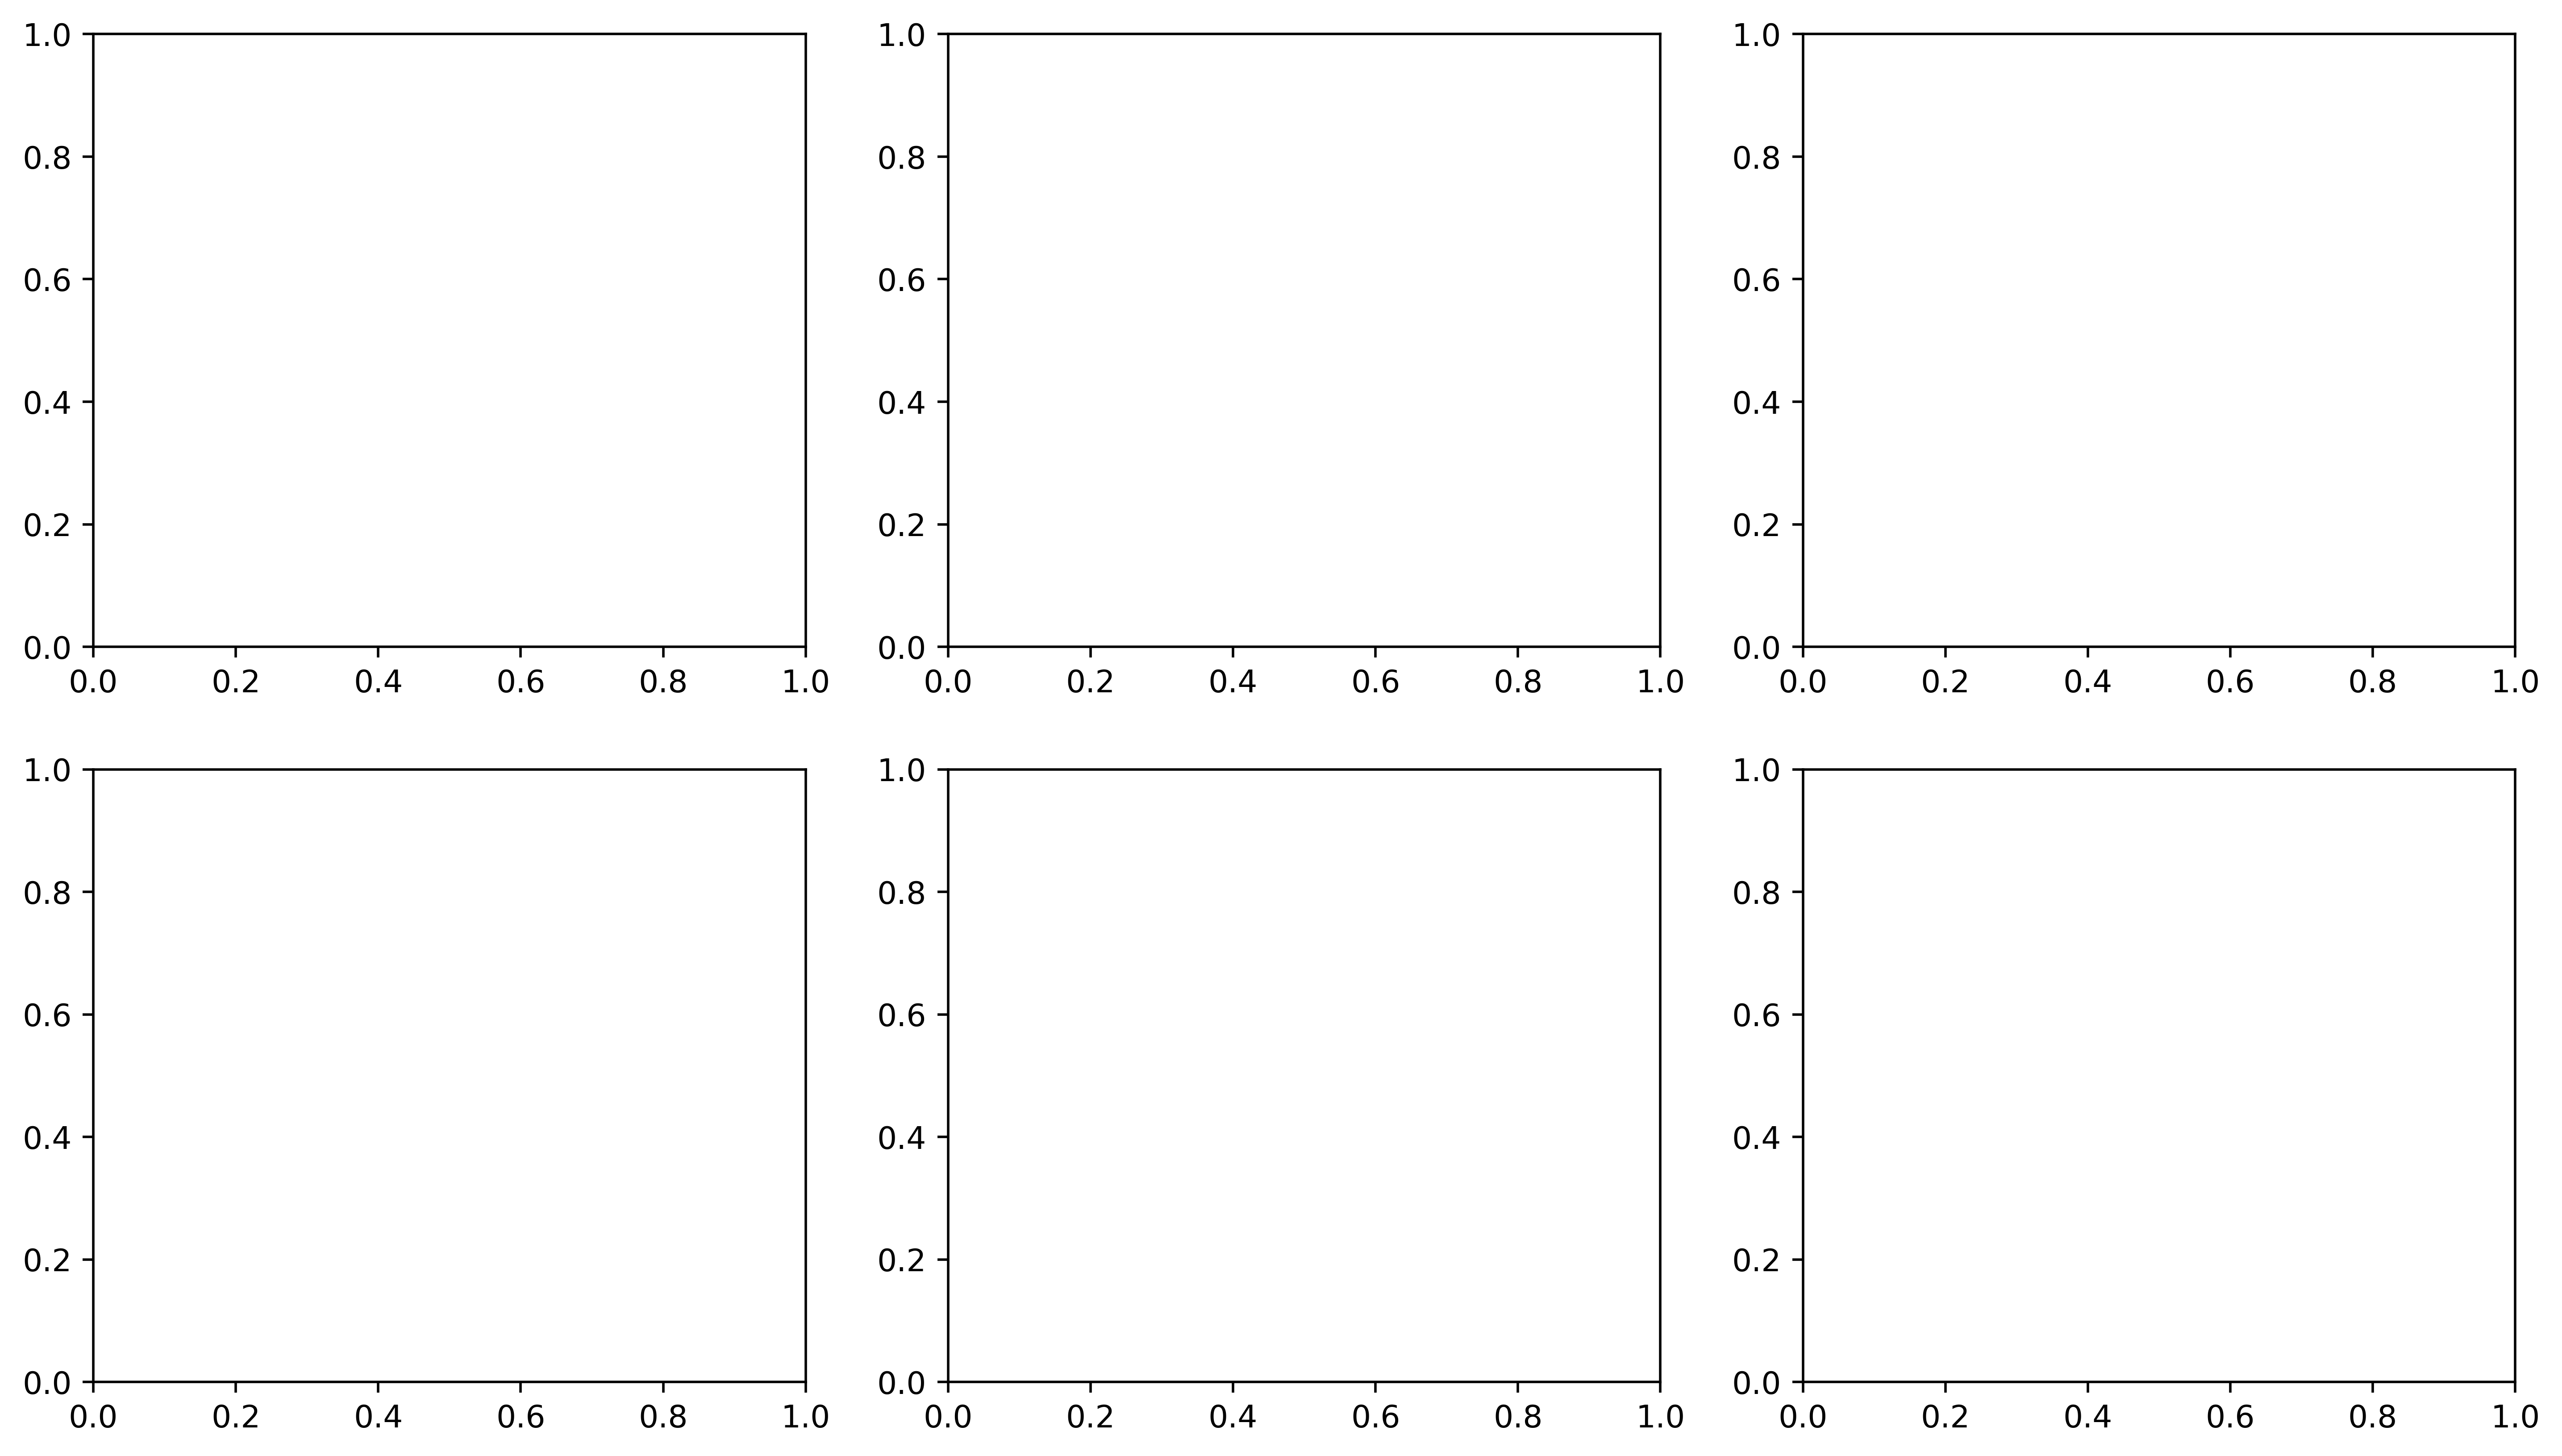

In [6]:
aeronet_plot (path="D:/Josefina/paper_git/paper_maiac/datasets/aeronet/USA",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors =["#99d8c9","#fa9fb5","#a6bddb","#756bb1","#fec44f","#fc9272"], plot='LALAL')
